In [1]:
import numpy as np
import csv
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

In [2]:
#/content/drive/MyDrive/DRED.csv
from google.colab import drive
drive.mount('/content/drive')
import os
path = "./content/drive/MyDrive/DRED.csv"

def classifer_metrics(y_true, y_pred):
    classifer_accuracy = accuracy_score(y_true, y_pred)*100
    classifier_f1_score = f1_score(y_true, y_pred, average='macro')*100
    return classifer_accuracy, classifier_f1_score

def plot_roc_curve(y_true, y_pred):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


# This line reads the dataset names instead of hardcoding them.
datasets = os.listdir('/content/drive/MyDrive/datasets')
#dataset = pd.read_csv(path)
iterations = 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


------------- DRED Execution -------------
Dataset Size: (166353, 6)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Neural Network Model Summary: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                60        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
fc3 (Dense)                  (None, 10)                110       
_________________________________________________________________
fc4 (Dense)                  (None, 10)                110       
_________________________________________________________________
fc5 (Dense)                  (None, 10)                110       
_________________________________________________________________
fc6 (Dense)                  (None, 10)                110       
_________________________________________________________________
fc7 (Dense)            

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


666/666 [==============================] - 1s 1ms/step - loss: 0.0210 - accuracy: 0.9927 - mse: 0.0022 - mae: 0.0040 - f1_score: 0.9927 - recall: 0.9927


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Training Time_1: --- 98.3067 seconds ---
----------------------------------------------


Average Training Time: --- 98.3067 seconds ---


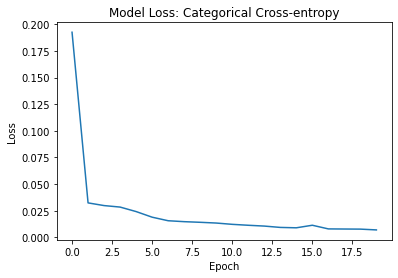

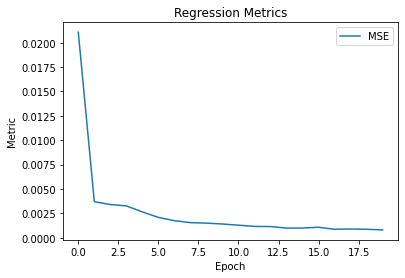

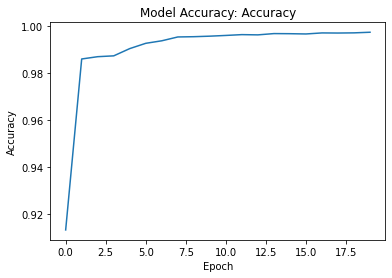

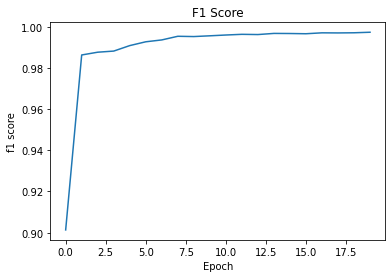

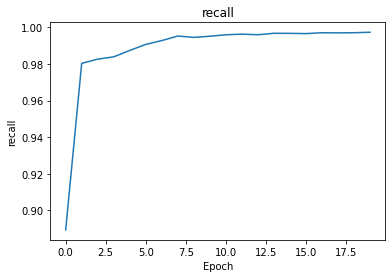

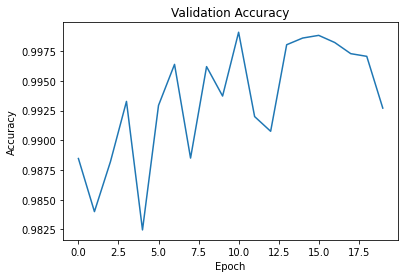

Confusion matrix
[[ 8847     0     0   225     0]
 [    0   657     0     0     2]
 [    4     0   653     0     0]
 [    0     0     0  6931     0]
 [   11     0     0     0 15941]]


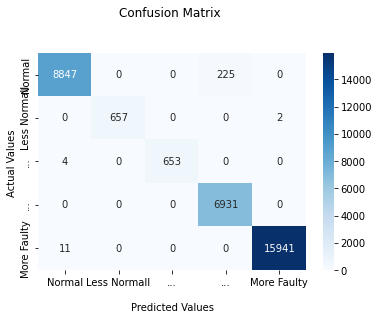

----------------------------------------------

------------- DRED Summary -------------
Training Time_1: --- 98.3067 seconds ---
----------------------------------------------


Average Training Time: --- 98.3067 seconds ---


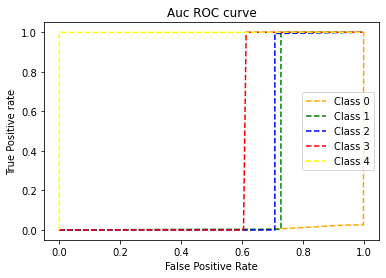

In [6]:
#DNN
training_time_DNN = {k:[] for k in datasets}
training_accuracy_DNN = {k:[] for k in datasets}
training_f1_score_DNN = {k:[] for k in datasets}
testing_time_DNN = {k:[] for k in datasets}
testing_accuracy_DNN = {k:[] for k in datasets}
testing_f1_score_DNN = {k:[] for k in datasets}


for dataset in datasets:
    print(f"------------- {dataset[:-4]} Execution -------------")
    with open(f'/content/drive/MyDrive/datasets/{dataset}','r') as csv_file:
        csv_reader = csv.reader(csv_file)
        data = list(csv_reader)

    data = np.array(data)
    data = data.astype(np.float)
        
    num_observations = data.shape[0]
    num_features = data.shape[1] - 1

    print(f"Dataset Size: {data.shape}\n")

    for i in range(iterations):
         # Shuffle the data
        shuffle_idx = np.random.permutation(num_observations)
        shuffled_data = data[shuffle_idx,:]

        X = shuffled_data[:,:-1]
        Y = shuffled_data[:,-1]

        y_ = Y.reshape(-1, 1) # Convert data to a single column

        # normlize power column in dataset
        X[:,1] = (X[:,1] - X[:,1].mean())/(X[:,1].max()-X[:,1].min())

        # One Hot encode the class labels
        encoder = OneHotEncoder(sparse=False)
        Y = encoder.fit_transform(y_)

        #le = LabelEncoder()
        #Y = le.fit_transform(y_)

        # Split the data for training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

        def recall(y_true, y_pred):
            true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
            possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
            recall = true_positives / (possible_positives + K.epsilon())
            return recall

        def precision(y_true, y_pred):
            true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
            predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
            precision = true_positives / (predicted_positives + K.epsilon())
            return precision


        def f1_score(y_true, y_pred):
            precision_m = precision(y_true, y_pred)
            recall_m = recall(y_true, y_pred)
            return 2*((precision_m*recall_m)/(precision_m+recall_m+K.epsilon()))


        # Build the model
        model = Sequential()
        model.add(Dense(10, input_shape=(num_features,), activation='relu', name='fc1'))
        model.add(Dense(10, activation='relu', name='fc2'))
        model.add(Dense(10, activation='relu', name='fc3'))
        model.add(Dense(10, activation='relu', name='fc4'))
        model.add(Dense(10, activation='relu', name='fc5'))
        model.add(Dense(10, activation='relu', name='fc6'))
        model.add(Dense(10, activation='relu', name='fc7'))
        model.add(Dense(10, activation='relu', name='fc8'))
        model.add(Dense(10, activation='relu', name='fc9'))
        model.add(Dense(10, activation='relu', name='fc10'))
        model.add(Dense(10, activation='relu', name='fc11'))
        model.add(Dense(5, activation='softmax', name='output'))
        
        # Adam optimizer with learning rate of 0.001
        optimizer = Adam(lr=0.001)
        model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'mse', 'mae', f1_score, recall])

        print('Neural Network Model Summary: ')
        print(model.summary())

        # Train the model
        training_time_start = time.time()

        
        history = model.fit(X_train, y_train, verbose=2, batch_size=50, epochs=20, validation_split=0.2)
        y_train_pred = model.predict_classes(X_train)
        #classifir_accuracy, classifier_f1_score = classifer_metrics(np.argmax(y_train, axis=1), y_train_pred)
        #training_accuracy_DNN[dataset].append(classifir_accuracy)
        #training_f1_score_DNN[dataset].append(classifier_f1_score)
        # training_accuracy_DNN[dataset].append(history.history.get('accuracy')[-1]*100)
        # Evaluation
        loss, accuracy, mse, mae, f1_score, recall = model.evaluate(X_test, y_test, batch_size=50)

        training_time_end = time.time()
        training_time_DNN[dataset].append(training_time_end - training_time_start)

        # Test on unseen data
        testing_time_start = time.time()
        y_test_pred = model.predict_classes(X_test)
        #classifier_accuracy, classifier_f1_score = classifer_metrics(np.argmax(y_test, axis=1), y_test_pred)
        #testing_accuracy_DNN[dataset].append(classifier_accuracy)
        #testing_f1_score_DNN[dataset].append(classifier_f1_score)
        # testing_accuracy_DNN[dataset].append(results[1]*100)
        testing_time_end = time.time()
        testing_time_DNN[dataset].append(testing_time_end - testing_time_start)

        classifier_confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)

        pred_prob = model.predict_proba(X_test)

        #fpr, tpr, threshold  = roc_curve(np.argmax(y_test, axis=1), y_test_pred, pos_label=3)
        #roc_auc = auc(fpr, tpr)

        # print('Final test set loss: {:4f}'.format(results[0]))
        print(f"Training Time_{i+1}: --- {training_time_DNN[dataset][i]:.4f} seconds ---")
        #print(f"Training Accuracy_{i+1}: --- {training_accuracy_DNN[dataset][i]:.2f}%")
        #print(f"Training F1 Score_{i+1}: --- {training_f1_score_DNN[dataset][i]:.2f}%")
        #print(f"Testing Time_{i+1}: --- {testing_time_DNN[dataset][i]:.4f} seconds ---")
        #print(f"Testing Accuracy_{i+1}: --- {testing_accuracy_DNN[dataset][i]:.2f}%")
        #print(f"Testing F1 Score_{i+1}: --- {testing_f1_score_DNN[dataset][i]:.2f}%")
        print("----------------------------------------------\n")

    print(f"\nAverage Training Time: --- {np.mean(training_time_DNN[dataset]):.4f} seconds ---")
    #print(f"Average Training Accuracy: --- {np.mean(training_accuracy_DNN[dataset]):.2f}%")
    #print(f"Average Training F1 Score: --- {np.mean(training_f1_score_DNN[dataset]):.2f}%")
    #print(f"Average Testing Time: --- {np.mean(testing_time_DNN[dataset]):.4f} seconds ---")
    #print(f"Average Testing Accuracy: --- {np.mean(testing_accuracy_DNN[dataset]):.2f}%")
    #print(f"Average Testing F1 Score: --- {np.mean(testing_f1_score_DNN[dataset]):.2f}%\n")

    # Plot metric values at end of train-test cycle
    loss_fig = plt.figure(0)
    plt.figure(0)
    plt.plot(history.history['loss'])
    plt.title('Model Loss: Categorical Cross-entropy')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    metrics_fig = plt.figure(1)
    plt.figure(1)
    plt.plot(history.history['mse'])
    plt.title('Regression Metrics')
    plt.ylabel('Metric')
    plt.xlabel('Epoch')
    plt.legend(['MSE'], loc='upper right')
    plt.show()

    acc_fig = plt.figure(2)
    plt.figure(2)
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy: Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

    f1_fig = plt.figure(3)
    plt.figure(3)
    plt.plot(history.history['f1_score'])
    plt.title('F1 Score')
    plt.ylabel('f1 score')
    plt.xlabel('Epoch')
    plt.show()

    recall_fig = plt.figure(4)
    plt.figure(4)
    plt.plot(history.history['recall'])
    plt.title('recall')
    plt.ylabel('recall')
    plt.xlabel('Epoch')
    plt.show()

    val_fig = plt.figure(5)
    plt.figure(5)
    plt.plot(history.history['val_accuracy'])
    plt.title('Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()


    print('Confusion matrix')
    print(classifier_confusion_matrix)

    group_counts = ["{0:0.0f}".format(value) for value in classifier_confusion_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in classifier_confusion_matrix.flatten()/np.sum(classifier_confusion_matrix)]

    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(5,5)

    ax = sns.heatmap(classifier_confusion_matrix, annot=True, fmt='', cmap='Blues')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Normal','Less Normall','...','...','More Faulty'])
    ax.yaxis.set_ticklabels(['Normal','Less Normall','...','...','More Faulty'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

    fpr = {}
    tpr = {}
    threshold = {}
    for i in range(5): 
        fpr[i], tpr[i], threshold[i]  = roc_curve(np.argmax(y_test, axis=1), y_test_pred, pos_label=i)
        
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3')
    plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4')
    plt.title('Auc ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Auc ROC',dpi=300);  




for dataset in datasets:
    print("----------------------------------------------\n")
    print(f"------------- {dataset[:-4]} Summary -------------")
    for i in range(iterations):
        print(f"Training Time_{i+1}: --- {training_time_DNN[dataset][i]:.4f} seconds ---")
        #print(f"Training Accuracy_{i+1}: --- {training_accuracy_DNN[dataset][i]:.2f}%")
        #print(f"Training F1 Score_{i+1}: --- {training_f1_score_DNN[dataset][i]:.2f}%")
        #print(f"Testing Time_{i+1}: --- {testing_time_DNN[dataset][i]:.4f} seconds ---")
       # print(f"Testing Accuracy_{i+1}: --- {testing_accuracy_DNN[dataset][i]:.2f}%")
        #print(f"Testing F1 Score_{i+1}: --- {testing_f1_score_DNN[dataset][i]:.2f}%")
        print("----------------------------------------------\n")

    print(f"\nAverage Training Time: --- {np.mean(training_time_DNN[dataset]):.4f} seconds ---")
    #print(f"Average Training Accuracy: --- {np.mean(training_accuracy_DNN[dataset]):.2f}%")
    #print(f"Average Training F1 Score: --- {np.mean(training_f1_score_DNN[dataset]):.2f}%")
    #print(f"Average Testing Time: --- {np.mean(testing_time_DNN[dataset]):.4f} seconds ---")
    #print(f"Average Testing Accuracy: --- {np.mean(testing_accuracy_DNN[dataset]):.2f}%")
    #print(f"Average Testing F1 Score: --- {np.mean(testing_f1_score_DNN[dataset]):.2f}%\n")